In [2]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Replace the path below with the actual path to your CSV file if it's not in the same directory as your Jupyter Notebook
file_path = 'commodities_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)

In [4]:
# Convert the datetime column to a datetime object
#df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')

# Convert the 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
# Display the first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66131836 entries, 0 to 66131835
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     int64         
 5   item.name   object        
 6   item.class  object        
 7   datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.9+ GB


In [6]:
df.head()

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00


In [7]:
# Group by 'item.class' and count unique 'item.id'
class_counts = df.groupby('item.class')['item.id'].nunique()

print("Number of unique items for each item class:")
print(class_counts)

Number of unique items for each item class:
item.class
Armor              11
Consumables      3196
Gems             1000
Glyphs            111
Miscellaneous    1943
Recipes             3
Trade Goods      2092
Unknown           623
Name: item.id, dtype: int64


In [8]:
# Count all rows in the DataFrame
total_rows = len(df)
print(f"Total rows in the DataFrame: {total_rows:,}")

Total rows in the DataFrame: 66,131,836


In [9]:
# Replace 'Unknown' with NaN for item.name and item.class
df['item.name'] = df['item.name'].replace('Unknown', pd.NA)
df['item.class'] = df['item.class'].replace('Unknown', pd.NA)

# Count the total number of items
total_items = len(df)

# Count items where 'name' or 'class' is missing or 'Unknown'
missing_name = len(df[df['item.name'].isna()])
missing_class = len(df[df['item.class'].isna()])
missing_both = len(df[df['item.name'].isna() & df['item.class'].isna()])

# Print the results
print(f"Total rows: {total_items:,}")
print(f"Rows missing name: {missing_name:,}")
print(f"Rows missing class: {missing_class:,}")
print(f"Rows missing both name and class: {missing_both:,}")


Total rows: 66,131,836
Rows missing name: 4,691
Rows missing class: 6,156,711
Rows missing both name and class: 4,691


In [10]:
df.head(5)

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00


In [11]:
# Count the occurrences of each auction id
id_counts = df['id'].value_counts()

# Get the top 5 auction ids with the most entries
top_five_auctions = id_counts.head(5)

print("Top five auctions by total number of entries:")
print(top_five_auctions)

Top five auctions by total number of entries:
id
1892309755    50
1892308916    50
1892307141    50
1892307155    50
1892307214    50
Name: count, dtype: int64


In [12]:
# Filter the DataFrame for auction id 1892306429
specific_auction_df = df[df['id'] == 1892307450]

# Sort the filtered DataFrame by the 'datetime' column in ascending order
specific_auction_df_sorted = specific_auction_df.sort_values(by='datetime', ascending=True)
print(specific_auction_df_sorted.to_string())

                  id  quantity  unit_price  time_left  item.id       item.name   item.class            datetime
52569856  1892307450         4       31500  VERY_LONG    18567  Elemental Flux  Trade Goods 2023-12-24 14:41:00
18715358  1892307450         4       31500  VERY_LONG    18567  Elemental Flux  Trade Goods 2023-12-24 15:41:00
65247666  1892307450         4       31500  VERY_LONG    18567  Elemental Flux  Trade Goods 2023-12-24 16:41:00
26104175  1892307450         4       31500  VERY_LONG    18567  Elemental Flux  Trade Goods 2023-12-24 17:41:00
53588339  1892307450         4       31500  VERY_LONG    18567  Elemental Flux  Trade Goods 2023-12-24 18:41:00
21119779  1892307450         4       31500  VERY_LONG    18567  Elemental Flux  Trade Goods 2023-12-24 19:41:00
61623850  1892307450         4       31500  VERY_LONG    18567  Elemental Flux  Trade Goods 2023-12-24 20:41:00
27441108  1892307450         4       31500  VERY_LONG    18567  Elemental Flux  Trade Goods 2023-12-24 2

In [13]:
# Filter the DataFrame for auction id 1892310233
specific_auction_df = df[df['id'] == 1892310233]

# Sort the filtered DataFrame by the 'datetime' column in ascending order
specific_auction_df_sorted = specific_auction_df.sort_values(by='datetime', ascending=True)
print(specific_auction_df_sorted.to_string())

                  id  quantity  unit_price  time_left  item.id          item.name   item.class            datetime
52570649  1892310233         1         100  VERY_LONG    17404  Blended Bean Brew  Consumables 2023-12-24 14:41:00
18715724  1892310233         1         100  VERY_LONG    17404  Blended Bean Brew  Consumables 2023-12-24 15:41:00
65247947  1892310233         1         100  VERY_LONG    17404  Blended Bean Brew  Consumables 2023-12-24 16:41:00
26104413  1892310233         1         100  VERY_LONG    17404  Blended Bean Brew  Consumables 2023-12-24 17:41:00
53588550  1892310233         1         100  VERY_LONG    17404  Blended Bean Brew  Consumables 2023-12-24 18:41:00
21119964  1892310233         1         100  VERY_LONG    17404  Blended Bean Brew  Consumables 2023-12-24 19:41:00
61624032  1892310233         1         100  VERY_LONG    17404  Blended Bean Brew  Consumables 2023-12-24 20:41:00
27441286  1892310233         1         100  VERY_LONG    17404  Blended Bean Bre

In [14]:
# Filter the DataFrame for auction id 1892310138
specific_auction_df = df[df['id'] == 1892310138]

# Sort the filtered DataFrame by the 'datetime' column in ascending order
specific_auction_df_sorted = specific_auction_df.sort_values(by='datetime', ascending=True)
print(specific_auction_df_sorted.to_string())

                  id  quantity  unit_price  time_left  item.id            item.name   item.class            datetime
52570613  1892310138         5         800  VERY_LONG    44482  Trusty Copper Racer  Consumables 2023-12-24 14:41:00
18715712  1892310138         5         800  VERY_LONG    44482  Trusty Copper Racer  Consumables 2023-12-24 15:41:00
65247936  1892310138         5         800  VERY_LONG    44482  Trusty Copper Racer  Consumables 2023-12-24 16:41:00
26104403  1892310138         5         800  VERY_LONG    44482  Trusty Copper Racer  Consumables 2023-12-24 17:41:00
53588543  1892310138         5         800  VERY_LONG    44482  Trusty Copper Racer  Consumables 2023-12-24 18:41:00
21119958  1892310138         5         800  VERY_LONG    44482  Trusty Copper Racer  Consumables 2023-12-24 19:41:00
61624026  1892310138         5         800  VERY_LONG    44482  Trusty Copper Racer  Consumables 2023-12-24 20:41:00
27441280  1892310138         5         800  VERY_LONG    44482  

In [15]:
# Define the expected values in the correct format
expected_values = ["VERY_LONG", "LONG", "MEDIUM", "SHORT"]

# Filter the DataFrame for rows where time_left is not one of the expected values
unexpected_time_left = df[~df['time_left'].isin(expected_values)]

# Check if there are any such entries
if not unexpected_time_left.empty:
    print("Entries with unexpected time_left values found:")
    print(unexpected_time_left)
else:
    print("All entries have expected time_left values.")

All entries have expected time_left values.


In [16]:

# Group by 'item.id', 'item.name', and 'datetime', then calculate min, max, median, and mean unit_price
price_stats = df.groupby(['item.id', 'item.name', 'datetime'])['unit_price'].agg(['min', 'max', 'median', 'mean']).reset_index()

# Sort the DataFrame by 'datetime' in ascending order
price_stats_sorted = price_stats.sort_values(by='datetime', ascending=True)

# Display the first 10 rows of the sorted DataFrame
price_stats_sorted.head(10)

,item.id,item.name,datetime,min,max,median,mean
0,117,Tough Jerky,2023-12-22 18:41:00,100,2554690000,100.0,2.045379e+07
1472248,173122,Quick Jewel Doublet,2023-12-22 18:41:00,30000,50000000,40000.0,8.454633e+06
1203529,133572,Nightborne Delicacy Platter,2023-12-22 18:41:00,1300,27900,1300.0,2.753846e+03
833708,67337,Deformed Ear,2023-12-22 18:41:00,9900,9900,9900.0,9.900000e+03
258274,20865,Ivory Scarab,2023-12-22 18:41:00,3200,253600,3600.0,1.209091e+04
554578,40026,Purified Twilight Opal,2023-12-22 18:41:00,390000,390000,390000.0,3.900000e+05
1784642,198417,Flourishing Pigment,2023-12-22 18:41:00,99600,2394200000,119800.0,1.432335e+08
834151,67357,Wriggling Worm,2023-12-22 18:41:00,30000100,30000100,30000100.0,3.000010e+07
32878,2750,Green Hills of Stranglethorn - Page 26,2023-12-22 18:41:00,80900,502300,291600.0,2.916000e+05
554816,40028,Mysterious Twilight Opal,2023-12-22 18:41:00,503000,24910000,1583000.0,3.934889e+06


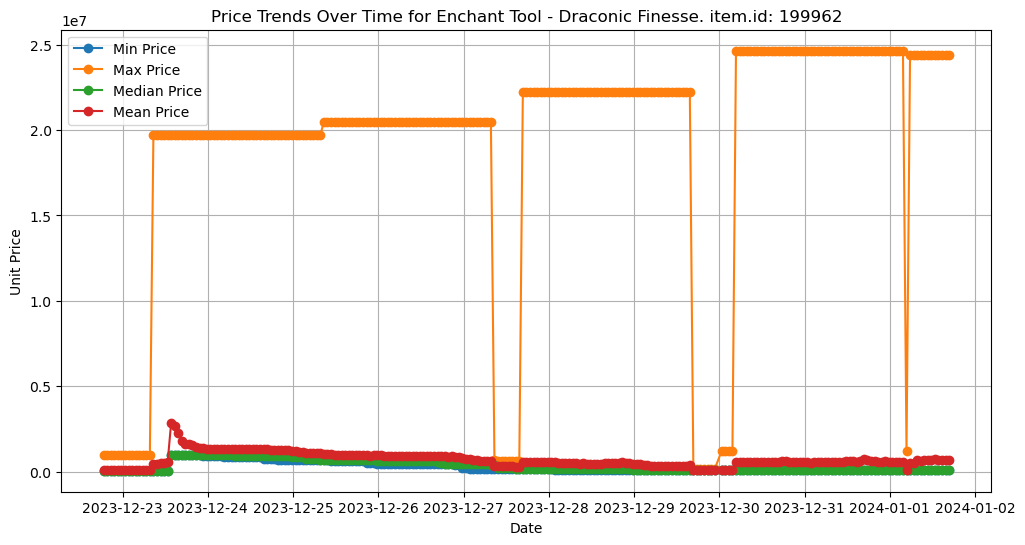

In [17]:
# Testing random item.id's from above
item_id = 199962
df_filtered = df[df['item.id'] == item_id]

# Group by 'item.id', 'item.name', and 'datetime', then calculate min, max, median, and mean unit_price
price_stats = df_filtered.groupby(['item.id', 'item.name', 'datetime'])['unit_price'].agg(['min', 'max', 'median', 'mean']).reset_index()

# Sort the DataFrame by 'datetime' in ascending order
price_stats_sorted = price_stats.sort_values(by='datetime', ascending=True)

item_name = price_stats_sorted['item.name'].iloc[0]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(price_stats_sorted['datetime'], price_stats_sorted['min'], label='Min Price', marker='o')
plt.plot(price_stats_sorted['datetime'], price_stats_sorted['max'], label='Max Price', marker='o')
plt.plot(price_stats_sorted['datetime'], price_stats_sorted['median'], label='Median Price', marker='o')
plt.plot(price_stats_sorted['datetime'], price_stats_sorted['mean'], label='Mean Price', marker='o')

# Titles and labels
plt.title(f'Price Trends Over Time for {item_name}. item.id: {item_id}')
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [18]:
# Group by 'item.id' and calculate the variance of the mean unit_price
mean_price_variance = price_stats_sorted.groupby('item.id')['mean'].var()

# Identify the item.id with the largest variance
item_id_with_max_variance = mean_price_variance.idxmax()
max_variance_value = mean_price_variance.max()

# Optionally, retrieve the item name corresponding to this item.id
item_name_with_max_variance = price_stats_sorted[price_stats_sorted['item.id'] == item_id_with_max_variance]['item.name'].iloc[0]

print(f"Item ID with the largest variance in mean unit price: {item_id_with_max_variance}")
print(f"Item Name: {item_name_with_max_variance}")
print(f"Variance in mean unit price: {max_variance_value}")


Item ID with the largest variance in mean unit price: 199962
Item Name: Enchant Tool - Draconic Finesse
Variance in mean unit price: 186280212189.70233


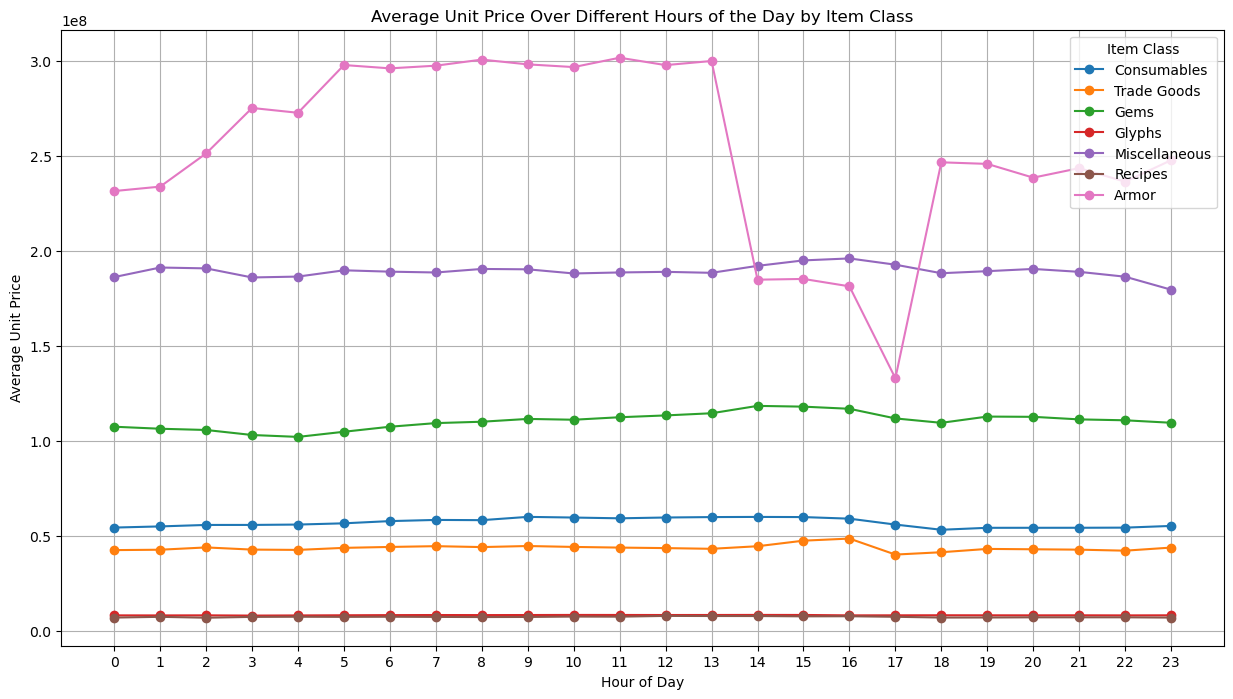

In [19]:
# Create a copy to avoid SettingWithCopyWarning
df_copy = df.copy()

# Filter out 'Unknown' or NaN values in 'item.class'
df_copy = df_copy[df_copy['item.class'].notna() & (df_copy['item.class'] != 'Unknown')]

# Extract the hour from the datetime column
df_copy['hour'] = df_copy['datetime'].dt.hour

# Plotting
plt.figure(figsize=(15, 8))

# List of unique item classes
item_classes = df_copy['item.class'].unique()

for item_class in item_classes:
    # Calculate mean unit_price for each class and hour
    mean_prices = df_copy[df_copy['item.class'] == item_class].groupby('hour')['unit_price'].mean().reset_index()
    plt.plot(mean_prices['hour'], mean_prices['unit_price'], marker='o', label=item_class)

plt.title('Average Unit Price Over Different Hours of the Day by Item Class')
plt.xlabel('Hour of Day')
plt.ylabel('Average Unit Price')
plt.xticks(range(0, 24))  # Set x-ticks to represent each hour
plt.legend(title='Item Class')
plt.grid(True)

# Show the plot
plt.show()

/var/folders/y2/14_x44lj4j5dz2lmwv2s62pc0000gn/T/ipykernel_3108/2777217683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  armor_df['hour'] = armor_df['datetime'].dt.hour


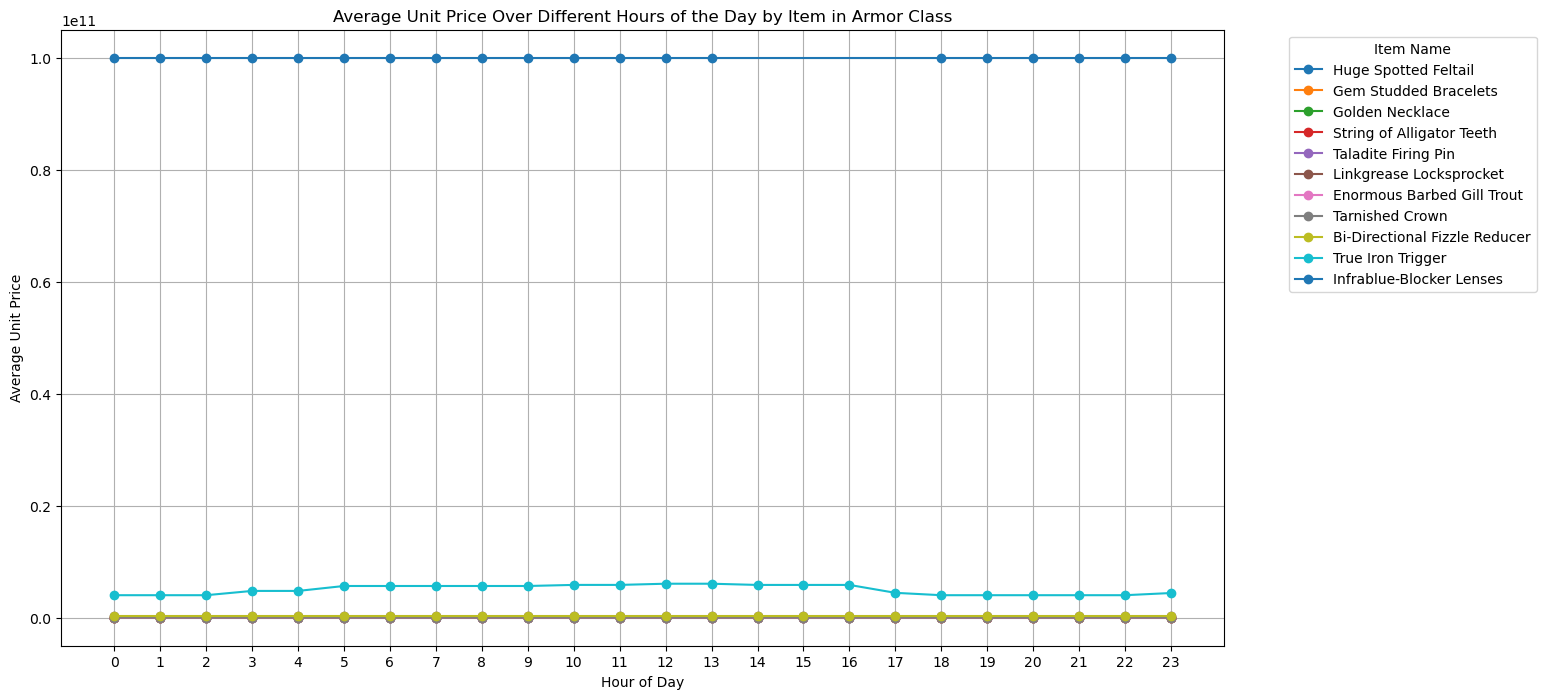

In [20]:
df_copy = df.copy()

# Filter for only 'Armor' class
armor_df = df_copy[df_copy['item.class'] == 'Armor']

# Extract the hour from the datetime column
armor_df['hour'] = armor_df['datetime'].dt.hour

# Plotting
plt.figure(figsize=(15, 8))

# Get unique names of items in the Armor class
unique_armor_items = armor_df['item.name'].unique()

for item_name in unique_armor_items:
    # Calculate mean unit_price for each item name and hour
    mean_prices_item = armor_df[armor_df['item.name'] == item_name].groupby('hour')['unit_price'].mean().reset_index()
    plt.plot(mean_prices_item['hour'], mean_prices_item['unit_price'], marker='o', label=item_name)

plt.title('Average Unit Price Over Different Hours of the Day by Item in Armor Class')
plt.xlabel('Hour of Day')
plt.ylabel('Average Unit Price')
plt.xticks(range(0, 24))  # Set x-ticks to represent each hour
plt.legend(title='Item Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

/var/folders/y2/14_x44lj4j5dz2lmwv2s62pc0000gn/T/ipykernel_3108/915849828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_ore_df['date'] = gold_ore_df['datetime'].dt.date
/var/folders/y2/14_x44lj4j5dz2lmwv2s62pc0000gn/T/ipykernel_3108/915849828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_ore_df['hour'] = gold_ore_df['datetime'].dt.hour


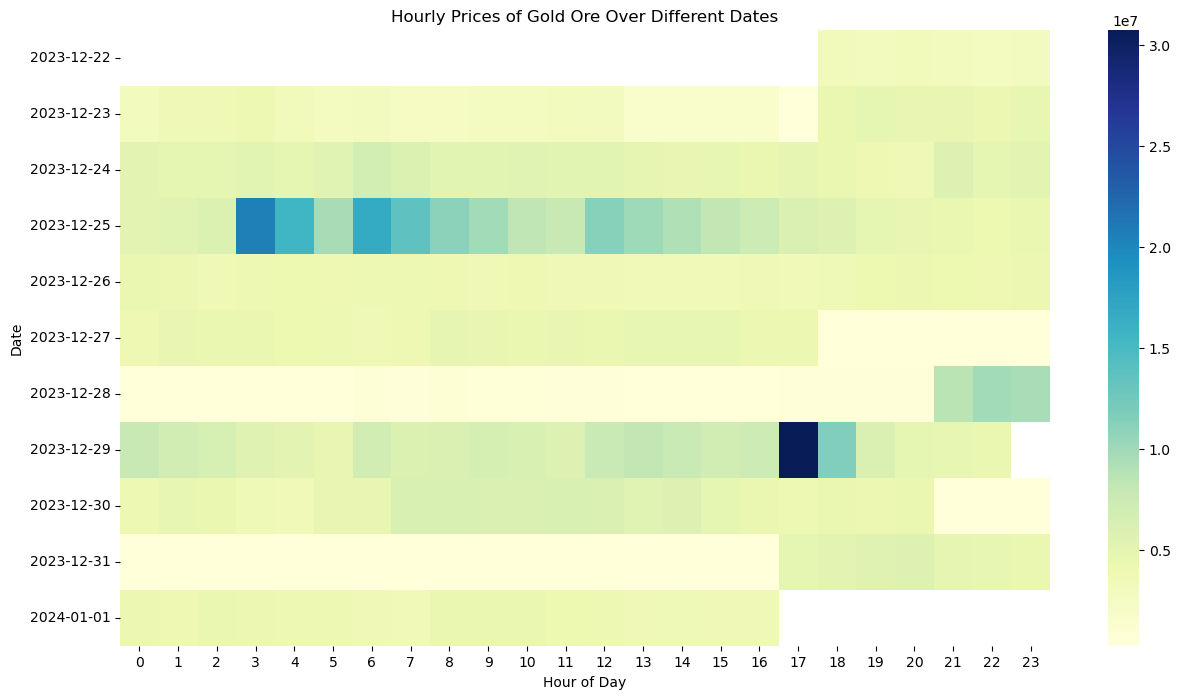

In [21]:
# Filter for the item named "Gold Ore"
gold_ore_df = df[df['item.name'] == "Gold Ore"]

# Extract date and hour from datetime
gold_ore_df['date'] = gold_ore_df['datetime'].dt.date
gold_ore_df['hour'] = gold_ore_df['datetime'].dt.hour

# Group by date and hour, then calculate mean unit_price
mean_prices = gold_ore_df.groupby(['date', 'hour'])['unit_price'].mean().reset_index()

# Pivot table for easier plotting
pivot_table = mean_prices.pivot(index='date', columns='hour', values='unit_price')

# Plotting
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False, fmt=".2f")
plt.title('Hourly Prices of Gold Ore Over Different Dates')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.show()

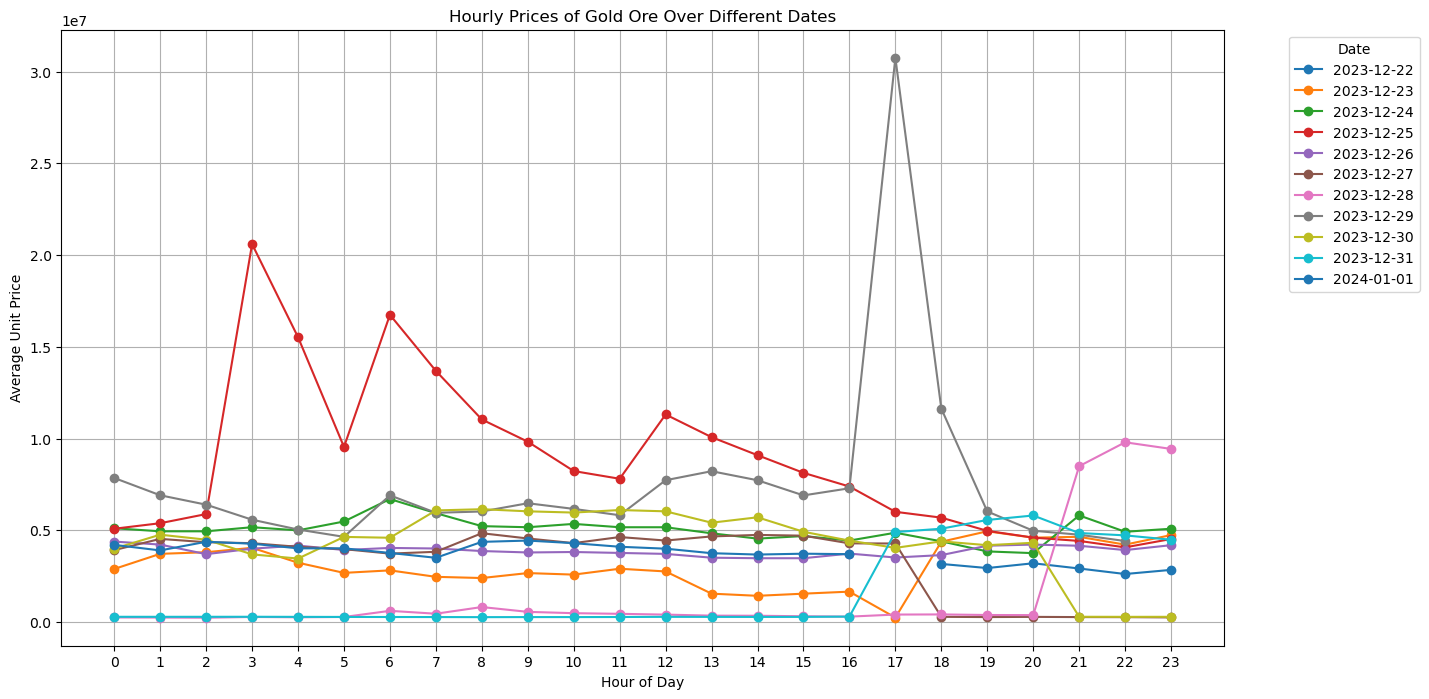

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df is your existing DataFrame

# Create a copy of the DataFrame filtered for "Gold Ore"
gold_ore_df = df[df['item.name'] == "Gold Ore"].copy()

# Extract date and hour from datetime
gold_ore_df['date'] = gold_ore_df['datetime'].dt.date
gold_ore_df['hour'] = gold_ore_df['datetime'].dt.hour

# Group by date and hour, then calculate mean unit_price
mean_prices = gold_ore_df.groupby(['date', 'hour'])['unit_price'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 8))

# Iterate over each unique date
for date in mean_prices['date'].unique():
    # Filter data for each specific date
    daily_data = mean_prices[mean_prices['date'] == date]
    plt.plot(daily_data['hour'], daily_data['unit_price'], marker='o', label=str(date))

# Formatting the plot
plt.title('Hourly Prices of Gold Ore Over Different Dates')
plt.xlabel('Hour of Day')
plt.ylabel('Average Unit Price')
plt.xticks(range(0, 24))  # Set x-ticks to represent each hour
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()